# COMP 135 day06 Lab: Multivariate Gaussian distributions

## Outline

* **Part 1: Multivariate Gaussian Distribution Basics**
* * Learn to sample from a multivariate Gaussian
* * Learn to make plots of joint, marginal, and conditional distributions

* **Part 2: Computing covariances**
* * Learn to compute empirical covariances of observed data
* * Learn to do an ML estimate of the mean and covariance parameters

* **Part 3: Visualizing Gaussians in 2D**
* * Learn to make contour plots of the level sets of the pdf
* * See that the level sets are *elliptical*


## Skills 

* To draw samples, use `multivariate_normal`
* * [`scipy.stats.multivariate_normal(mean_D, cov_DD).rvs(size=(nrows, ncols), random_state=SEED)`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html)
* * OR [`np.random.multivariate_normal(mean_D, cov_DD)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html)
* To evaluate the PDF:
* * Evaluate pdf with `scipy.stats.multivariate_normal(mean_D, cov_DD).pdf(values)`
* * Evaluate logpdf with `logpdf` instead of `pdf`


## Takeaways

* Visualization is fun!
* Using *vectorized* code (rather than for loops) is efficient to compute covariances


In [157]:
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
np.set_printoptions(precision=3, suppress=False)

In [3]:
pd.options.display.float_format = '{:,.3g}'.format  # show 3 digits of precision

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.25)

# Part 1: Multivariate Gaussian basics

## Basic facts



#### Random Variable: Vector data $x \in \mathbb{R}^D$

This is a real-valued vector with $D$ entries: $x = [x_1, x_2, \ldots x_D]^T$

#### Parameters: Location $\mu$ and scale $\sigma$

* Location or "mean" vector: $\mu = [\mu_1, \mu_2, \ldots \mu_D]^T$, so $\mu \in \mathbb{R}^D$

We'll denote this in code as `mean_D` (the `_D` suffix reminds us the shape is (D,)


* Covariance matrix $\Sigma$, which must be a $D \times D$ matrix that is symmetric and positive definite

We'll denote this in code as `cov_DD` (the `_DD` suffix reminds us the shape is (D, D)

#### Formal definition of PDF: 

\begin{align}
\text{MVNormalPDF}(x | \mu, \Sigma) = c(\mu, \Sigma) \cdot \exp \left( -\frac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right)
\end{align}

with normalizing "constant" (a term constant wrt our random variable $x$):

$$
c(\mu, \Sigma) = \frac{1}{(2\pi)^{D/2}} \frac{1}{\text{det}(\Sigma)^{1/2}}
$$

##  Sampling from the "standard" multivariate Gaussian with D = 2

We can use `np.random.multivariate_normal` to sample. 

It takes two parameters: `mean_D` and `cov_DD`

Set our random state so things are reproducible.

In [6]:
prng = np.random.RandomState(11)

Draw several samples from the *standard* multivariate Normal with D=2

In [116]:
zero_mean_2 = np.zeros(2)
identity_cov_22 = np.eye(2) # identity matrix

prng.multivariate_normal(zero_mean_2, identity_cov_22)

array([-0.671, -3.665])

In [117]:
prng.multivariate_normal(zero_mean_2, identity_cov_22)

array([ 0.412, -1.151])

In [118]:
prng.multivariate_normal(zero_mean_2, identity_cov_22)

array([0.414, 0.092])

### Scatterplot of 10000 samples from a *standard* Gaussian

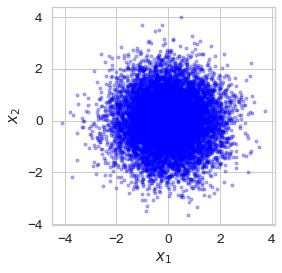

In [119]:
N = 10000
x_N2 = prng.multivariate_normal(zero_mean_2, identity_cov_22, size=N)
plt.plot(x_N2[:,0], x_N2[:,1], 'b.', alpha=0.3)
plt.gca().set_aspect('equal');
plt.xlabel('$x_1$');
plt.ylabel('$x_2$');

## Pair plot visualization of standard D=2 Gaussian

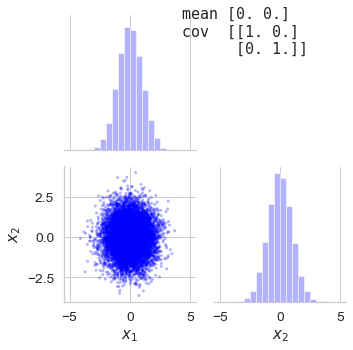

In [120]:
# Pack samples into a pandas dataframe to plot
x_df = pd.DataFrame(x_N2, columns=['$x_1$', '$x_2$'])

# Define consistent visual limits
ymax_hist = 100
xmax = 5.0
n_bins = 21

# Make the pair plot
sns.pairplot(
    x_df,
    aspect=1.0,
    corner=True, # only plot lower left half of square
    diag_kws={"color": 'b', "alpha": 0.3, "bins":np.linspace(-B, B, n_bins)},
    plot_kws={"color": 'b', "alpha": 0.3, 'marker': '.', 'edgecolor':'none'});
# ^- alpha here means transparency for the 'alpha' channel of the RGB-A scheme

# Set view limits of *diagonal plots* to a standardized window
for diag_tuple in [(0,0), (1,1)]:
    h.axes[diag_tuple[0], diag_tuple[1]].set_xlim([-xmax, xmax]);
    h.axes[diag_tuple[0], diag_tuple[1]].set_ylim([0, ymax_hist]);

# Set view limits of *off-diagonal* scatter plots to a standardized window
h.axes[1,0].set_xlim([-xmax, xmax]);
h.axes[1,0].set_ylim([-xmax, xmax]);

# Prettify the overall plot
plt.tight_layout();
plt.suptitle(
    "mean %s\ncov  %s" % (
        str(zero_mean_2),
        str(identity_cov_22).replace("\n","\n     ")), 
    fontsize=14,
    horizontalalignment='left',
    font='monospace');

## Discussion 1a: What can you say about x1 and x2 in terms of *independence*?

In [122]:
# TODO discuss

##  Sampling from a D=2 multivariate Gaussian with *negative correlations*


In [130]:
zero_mean_2 = np.zeros(2)
neg_corr_cov_22 = np.asarray([
    [3.0, -1.7],
    [-1.7, 1.0],
])

print("Mean")
print("-----")
print(zero_mean_2)
print("\nCovar")
print("-----")
print(neg_corr_cov_22)

Mean
-----
[0. 0.]

Covar
-----
[[ 3.  -1.7]
 [-1.7  1. ]]


In [124]:
prng.multivariate_normal(zero_mean_2, neg_corr_cov_22)

array([-1.631,  0.889])

In [125]:
prng.multivariate_normal(zero_mean_2, neg_corr_cov_22)

array([ 2.549, -1.677])

In [126]:
prng.multivariate_normal(zero_mean_2, neg_corr_cov_22)

array([ 0.439, -0.257])

In [131]:
prng.multivariate_normal(zero_mean_2, neg_corr_cov_22)

array([ 0.989, -0.171])

## Discussion 1b: What do you notice about the relationship between x1 and x2 here? Is there something about their signs that is a consistent pattern?

In [132]:
# TODO discuss

## Pair plot visualization with negative correlation

In [133]:
N = 10000
x_N2 = prng.multivariate_normal(zero_mean_2, neg_corr_cov_22, size=N)
print(x_N2[:3])
print("...")

[[ 0.675 -0.251]
 [-2.509  1.226]
 [ 0.977 -0.265]]
...


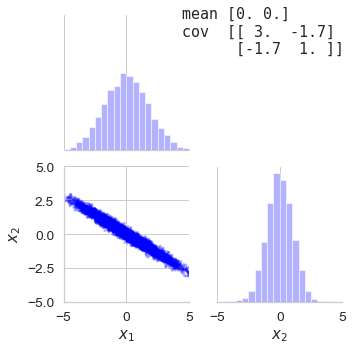

In [134]:
# Pack samples into a pandas dataframe to plot
x_df = pd.DataFrame(x_N2, columns=['$x_1$', '$x_2$'])

# Define consistent visual limits
ymax_hist = 100
xmax = 5.0
n_bins = 21

h = sns.pairplot(
    x_df,
    aspect=1.0,
    corner=True, # only plot lower left half of square
    diag_kws={"color": 'b', "alpha": 0.3, "bins":np.linspace(-xmax, xmax, n_bins)},
    plot_kws={"color": 'b', "alpha": 0.3, 'marker': '.', 'edgecolor':'none'},
    );
# ^- alpha here means transparency for the 'alpha' channel of the RGB-A scheme

# Set view limits of *diagonal plots* to a standardized window
for diag_tuple in [(0,0), (1,1)]:
    h.axes[diag_tuple[0], diag_tuple[1]].set_xlim([-xmax, xmax]);
    h.axes[diag_tuple[0], diag_tuple[1]].set_ylim([0, ymax_hist]);

# Set view limits of *off-diagonal* scatter plots to a standardized window
h.axes[1,0].set_xlim([-xmax, xmax]);
h.axes[1,0].set_ylim([-xmax, xmax]);

# Prettify the overall plot
plt.tight_layout();
plt.suptitle(
    "mean %s\ncov  %s" % (
        str(zero_mean_2),
        str(neg_corr_cov_22).replace("\n","\n     ")), 
    fontsize=14,
    horizontalalignment='left',
    font='monospace');

## Discussion 1b: Which of x1 or x2 has *smaller* marginal variance? Why?

How does what you see in the plots align with the definition of the covariance parameter here.

## Part 2: Estimate covariances from data

Let's take the *data* $x$ we observed in our previous plot above, and see if we can estimate the empirical covariance.

Remember, the data is in array `x_N2`


In [144]:
# Print out the array to remember what we're working with.
print("x_N2: shape = %s" % str(x_N2.shape))
print("----")
print(x_N2[:5])
print("...")
print(x_N2[-5:])

x_N2: shape = (10000, 2)
----
[[ 0.675 -0.251]
 [-2.509  1.226]
 [ 0.977 -0.265]
 [-1.722  1.359]
 [-1.886  0.93 ]]
...
[[-2.272  1.546]
 [ 0.1   -0.122]
 [ 1.189 -0.434]
 [ 2.376 -1.429]
 [ 0.488 -0.044]]


## Exercise 2a: Compute the empirical covariance for $x_1, x_1$

Remember, the general formula for the covariance of two random variables is:

$$
\text{Cov}(X_i, X_j) = \frac{1}{N} \sum_{n=1}^N (x_{ni} - \mu_i) (x_{nj} - \mu_j)
$$

Now, we want to compute for $i=1, j=1$

$$
\text{Cov}(X_1, X_1) = ?
$$

In [145]:
mean_x1 = np.mean(x_N2[:,0])  
cov_x1_x1 = 0.0 # TODO compute

print("Cov[x_1, x_1]")
print("-------------")
print(cov_x1_x1)

Cov[x_1, x_1]
-------------
0.0


## Exercise 2b: Compute the empirical covariance for $x_1, x_2$


In [146]:
## TODO compute just like in 1c

## Exercise 2c: Compute the empirical covariance for $x_2, x_2$:


In [147]:
## TODO compute just like 1d

## Exercise 2d: Compute the empirical covariance *matrix*

$$
\text{Cov}(X) = \frac{1}{N} \sum_{n=1}^N (x_{n} - \mu) (x_{n} - \mu)^T
$$

Inside the sum, that is an *outer product*

In [155]:
## TODO compute using matrix/vector ops.

## Starter code:

mean_2 = np.mean(x_N2, axis=0) # compute emprical mean of each column of x as a 2-dim vector
cov_22 = np.zeros((2,2))
for n in range(N):
    cov_22 += np.outer(x_N2[n,:], x_N2[n,:])  # todo fix me to use correct formula
cov_22 = cov_22 / N # divide by N

print(cov_22)

[[ 3.055 -1.736]
 [-1.736  1.023]]


## Discussion 2e: Does your answer look like the "true" covariance that generated the data?

Remember what the true cov was:

In [156]:
print(neg_corr_cov_22)

[[ 3.  -1.7]
 [-1.7  1. ]]
